<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод-и-рекомендации" data-toc-modified-id="Вывод-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод и рекомендации</a></span></li></ul></div>

# Исследование для сети фитнесс-центров "Культурист-датасаентист"

Данное исследование будет произведено на основе анкет собранных в единый, удобный формат.  
С помощью него можно будет рассчитать отток пользователей на уровне следующего месяца.  
В первую очередь необходимо будет произвести исследовательский анализ данных, далее последует построение модели прогнозирования.  
После всего этого потребуется кластеризировать всех пользователей и на основе этих групп сделать базовые рекомендации.

# Задачи проекта


* Научиться прогнозировать вероятность оттока для каждого клиента

* Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства

* Проанализировать основные признаки, наиболее сильно влияющие на отток

* Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами

# Описание данных

* `'churn'` - факт оттока в текущем месяце 
* `'gender'` - пол
* `'near_location'`  проживание или работа в районе, где находится фитнес-центр
* `'partner'` - сотрудник компании-партёра клуба
* `'promo_friends'` - факт первоначальной записи в рамках акции "приведи друга"
* `'phone'` - наличие контактного телефона
* `'age'` - возраст
* `'lifetime'` - время с первого обращения в фитнесс-центр
* `'contract_period'` - длительность текущего действующего аобнемента (месяц, 3 месяца, 6 месяцев, 1 год)
* `'month_to_end_contract'` - срок до окончания текущего действующего абонемента (в месяцах)
* `'group_visits'` - факт посещения групповых занятий
* `'avg_class_frequency_total'` - средняя частота посещений в неделю за все время с начала действия абонемента
* `'avg_class_frequency_current_month'` - средняя частота посещений в неделю за предыдущий месяц*
* `'avg_additional_charges_total'` - суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон


## Загрузка данных

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage

Импорт всех необходимых библиотек потребующихся для дальнейшей работы.

In [2]:
try:
    df = pd.read_csv('/datasets/gym_churn.csv')
except:
    df = pd.read_csv('gym_churn.csv')

Подгрузка файла с данными.

In [3]:
df.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Общий вид данных.

In [4]:
df.columns = df.columns.str.lower()

Перевод названий столбцов к нижнему регистру.

## Исследовательский анализ данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Информация о типах данных предоставленных в таблице.

In [6]:
display(pd.DataFrame(round((df.isna().mean()*100), 2), columns=['Пропуски %']).style.format(
    '{:.2f}').background_gradient(cmap='PuBu'))

,Пропуски %
gender,0.00
near_location,0.00
partner,0.00
promo_friends,0.00
phone,0.00
contract_period,0.00
group_visits,0.00
age,0.00
avg_additional_charges_total,0.00
month_to_end_contract,0.00


Проверка наличия пропусков.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Вывод по общему значению всех данных:

* Распределение по полу примерно одинаково
* 85% клиентов проживают или работают в непосредственной близости от фитнес-центра
* Сотрудниками компаний партнеров яввляются 48% посетителей
* Около 30% клиентов пришли по программе "Приведи друга"
* Известны мобильные номера более 90% клиентов
* В среднем длительность абонемента клиентов равна 4.6 месяцев
* Около 40% клиентов посещают групповые занятия
* Средний возраст посетителей фитнес-центра 29 лет
* Средний дополнительный доход от сторонних услуг каждого клиента  - 146
* Средний срок до окончания договора - 4.3 месяцев
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев
* Средняя частота посещений за все время - 1.87 раз в неделю
* Средняя частота посещений за последний месяц - 1.76 раз в неделю
* Доля клиентовв ушедших в отток - 27%

In [8]:
print('Оставшиеся клиенты:')
display(df.loc[df['churn'] == 0].describe().T)

Оставшиеся клиенты:


,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


In [9]:
print('Клиенты ушедшие в отток:')
display(df.loc[df['churn'] == 1].describe().T)

Клиенты ушедшие в отток:


,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


Вывод на основе разбивки по группам:

* Распределение по полу практически не отличается
* Клиенты находящиеся в непосредственной близости, реже попадают в отток
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
* Наличие мобильного номера клиента не отличается в группах
* Средняя длительность текущего абонемента у оставшися клиентов 5.7 месяцев, а у клиентов ушедших в отток 1.7 месяца
* Оставшиеся пользователи чаще ходят на групповые занятия
* В среднем клиенты ущедшие в отток младше на 3 года, нежели оставшиеся
* Оставшиеся клиенты более охотно тратят свои средства на дополнительные услуги
* Оставшееся время до окончания срока действия договора более чем в 3 раза превышает этот же показатель у клиентов ушедших  отток
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке

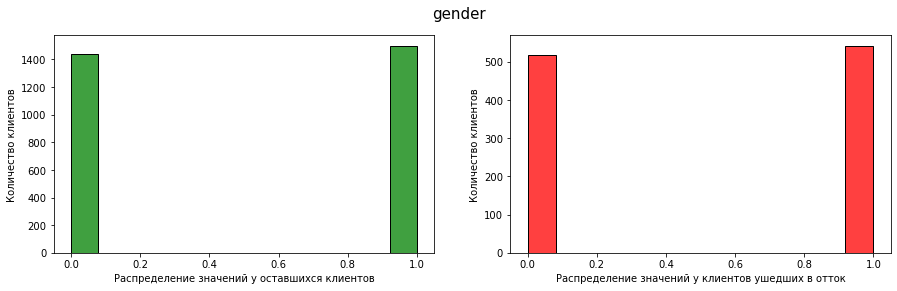

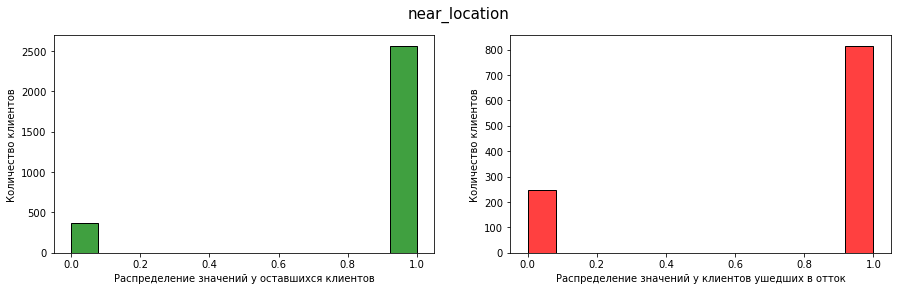

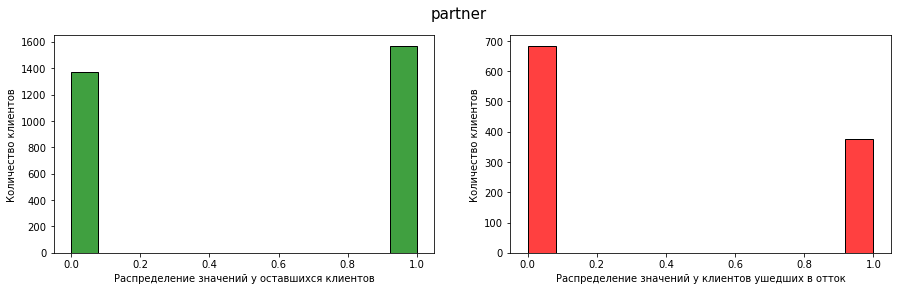

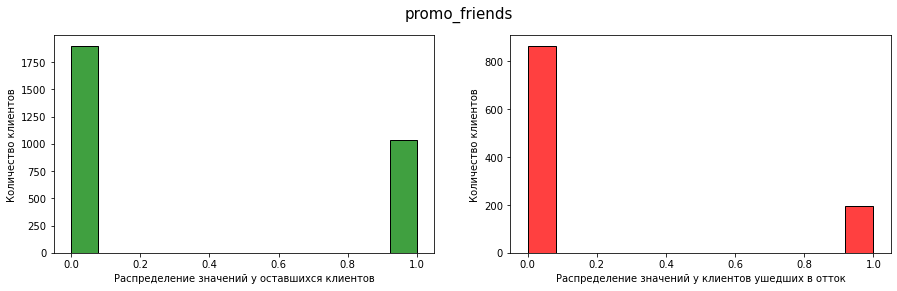

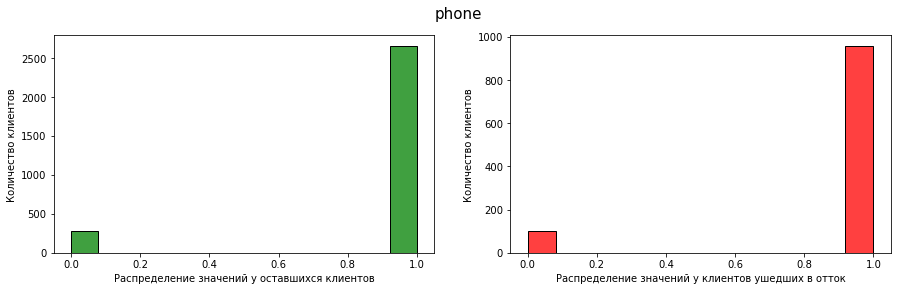

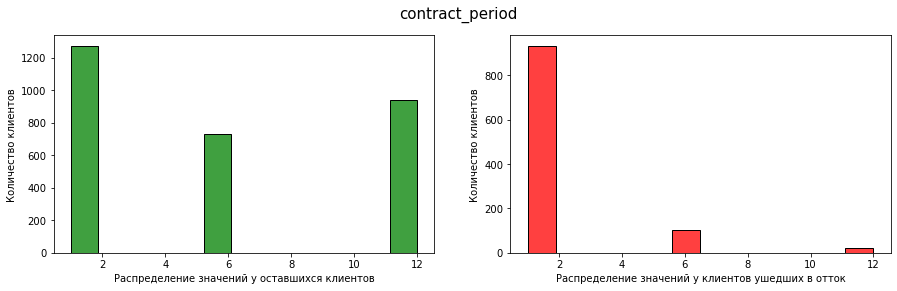

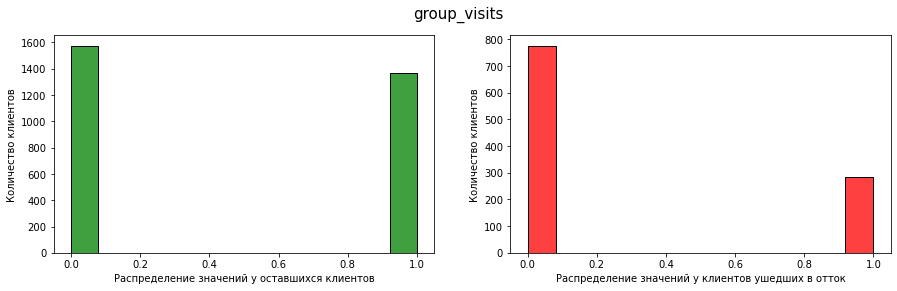

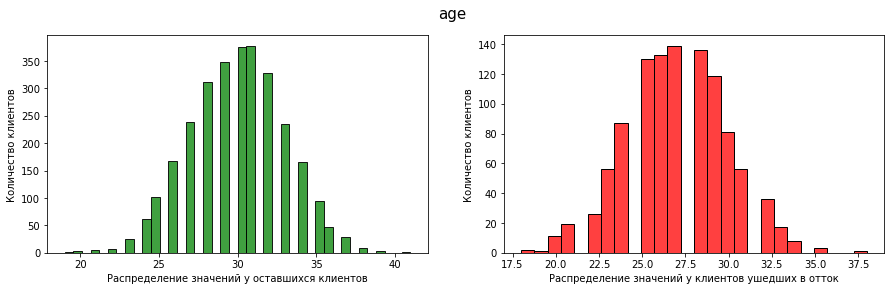

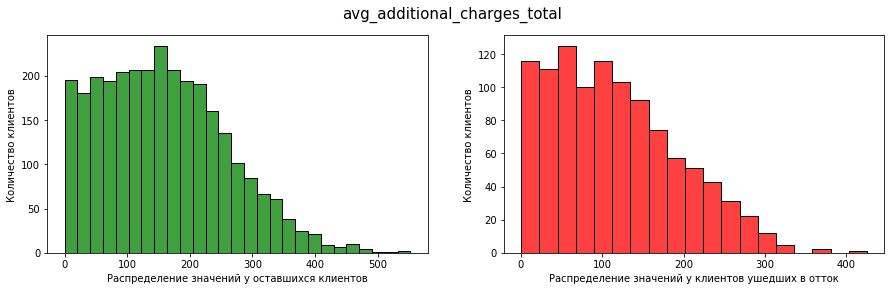

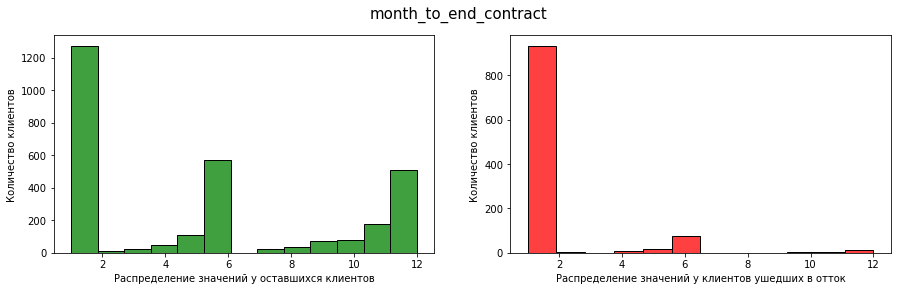

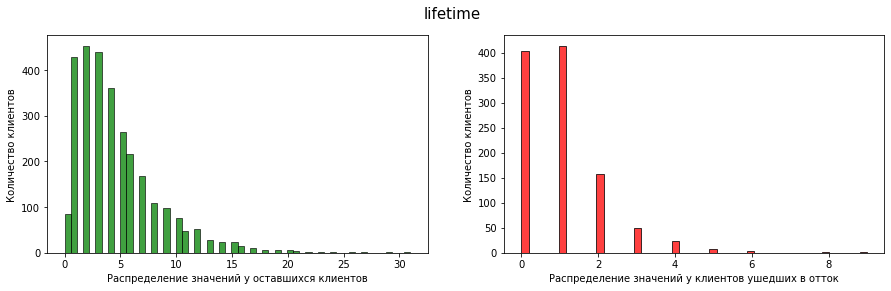

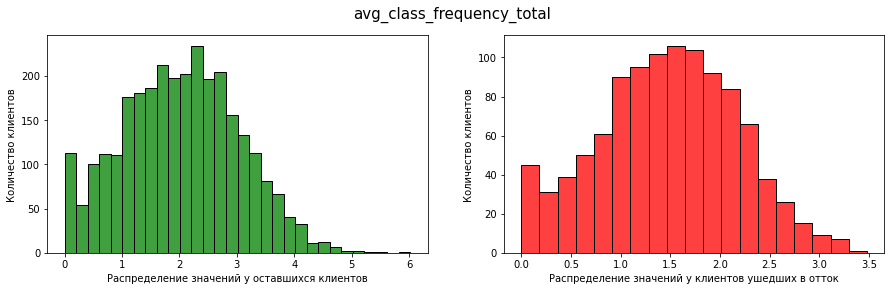

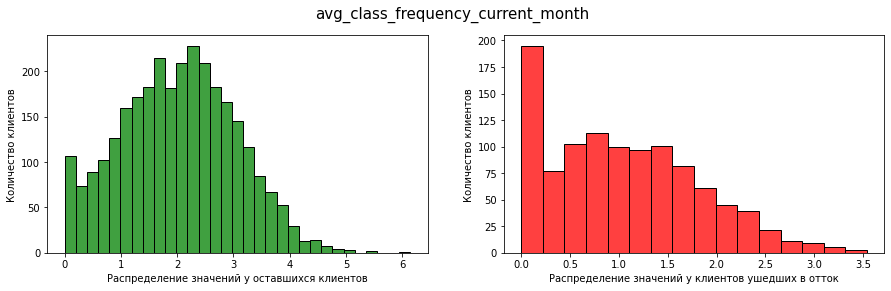

In [10]:
items_list = df.columns.drop('churn')
for i in items_list:
    fig, ax = plt.subplots(1 ,2, figsize = (15, 4))
    sns.histplot(x = i, 
                    data = df.loc[df['churn'] == 0], ax=ax[0], color = 'g')
    sns.histplot(x = i, 
                    data = df.loc[df['churn'] == 1], ax=ax[1], color = 'r')
    fig.suptitle(i, fontsize=15)
    ax[0].set(xlabel = 'Распределение значений у оставшихся клиентов')
    ax[0].set(ylabel = 'Количество клиентов')
    ax[1].set(xlabel = 'Распределение значений у клиентов ушедших в отток')
    ax[1].set(ylabel = 'Количество клиентов')
    plt.show()

Столбчатые гистограммы и распределения признаков клиентов.

Из них можно сделать следующие выводы:

* Факт того что клиент является сотрудником компании партнера, способствует дальнейшему его сотрудничеству с фитнес-центром
* Участие в групповых занятиях повышает шанс того, что клиент останется на следующий месяц
* Клиент занимающийся фитнесом более 2-ух раз в неделю, с наибольшей вероятностью не уйдет в отток

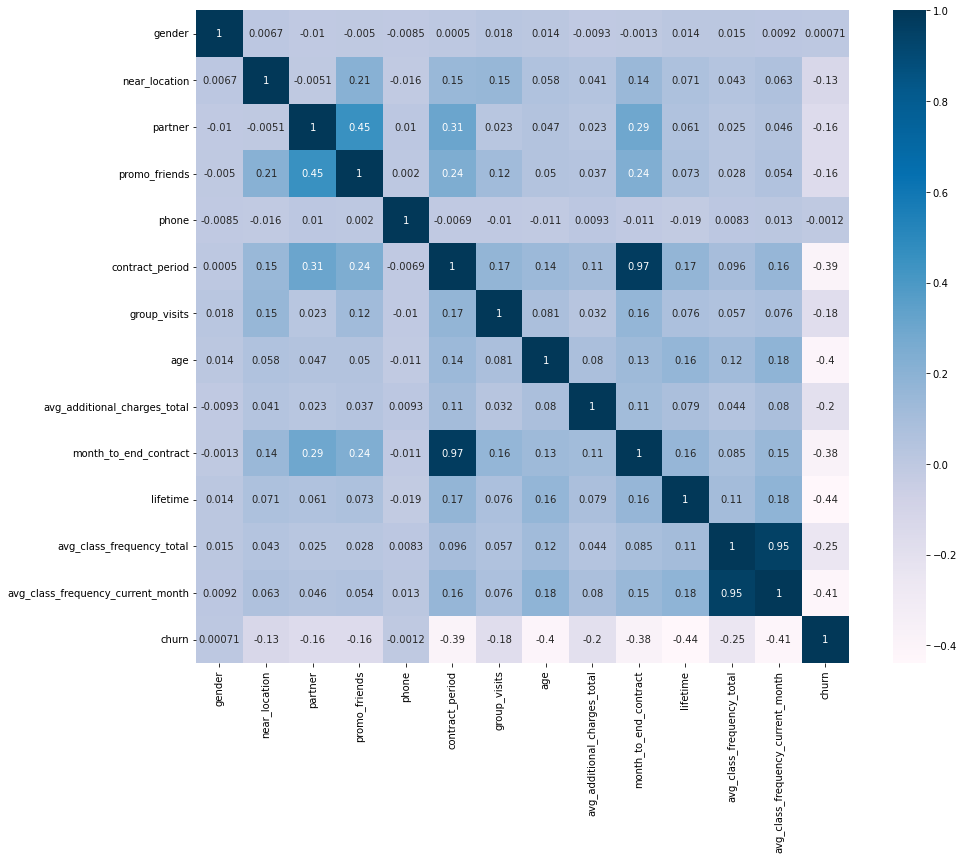

In [11]:
cm = df.corr() 
plt.figure(figsize=(16,12))
sns.heatmap(cm, annot=True, square=True, cmap='PuBu') ;

Матрица корреляций отражающая взаимосвязь всех исходных данных. Здесь присутствуют две пары мультиколлинеарных признаков:
* `contract_period` + `month_to_end_contact`
* `аvg_class_frequency_current_month` + `аvg_class_frequency_total`

Прямой зависимости оттока клиентов от какого либо параметра, не наблюдается.

In [12]:
df.duplicated().value_counts()

False    4000
dtype: int64

Проверка наличия дубликатов.

## Модель прогнозирования оттока клиентов

In [13]:
X = df.drop(['churn'], axis = 1)
y = df['churn']

Разделение данных на признаки и целевую переменную.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Разделение данных на обучающую и валидационную выборку.

In [15]:
scaler = StandardScaler()

X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

Стандартизация данных.

In [16]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

Выбор алгоритма логистической регрессии и последующее за ним обучение модели.

In [17]:
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

Расчет прогнозов.

In [18]:
print('Метрики для модели логистической регрессии:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions),
    recall_score(y_test, lr_predictions)
))

Метрики для модели логистической регрессии:
accuracy_score: 0.935
precision_score: 0.8960396039603961
recall_score:0.8537735849056604


In [19]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train) ;

Выбор алгоритма случайный лес и последующее за ним обучение модели.

In [29]:
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

Расчет прогнозов.

In [21]:
print('\nМетрики для модели случайного леса:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, rf_predictions),
    precision_score(y_test, rf_predictions),
    recall_score(y_test, rf_predictions)
))


Метрики для модели случайного леса:
accuracy_score: 0.9225
precision_score: 0.875
recall_score:0.8254716981132075


Среди двух выбранных алгоритмов прогнозов, наилучшим образом себя показала модель логистической регрессии.  
В ней полнота, точность и доля правильных прогнозов превышает аналогичные показатели у модели случайного леса.

In [22]:
features = pd.DataFrame(lr_model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef'] = features['coef'].apply(lambda x: abs(x))
features = features.sort_values(by='coef', ascending=False)

Создание таблицы в которой хранятся коэффициенты линейной регрессии.

In [23]:
print('\nКоэффициенты признаков в оптимальной функции логистической регрессии:')
print(features)


Коэффициенты признаков в оптимальной функции логистической регрессии:
                              feature      coef
12  avg_class_frequency_current_month  4.213410
10                           lifetime  3.581257
11          avg_class_frequency_total  3.111962
7                                 age  1.167067
5                     contract_period  0.703639
9               month_to_end_contract  0.631972
8        avg_additional_charges_total  0.571299
6                        group_visits  0.401414
3                       promo_friends  0.143413
2                             partner  0.066479
1                       near_location  0.052529
4                               phone  0.022421
0                              gender  0.006101


Наиболее значимыми признаками в моделе логистической регрессии являются:

* Средняя частота посещений в неделю за предыдущий месяц
* Время с момента первого обращения в фитнес-центр
* Средняя частота посещений в неделю за все время с начала действия абонемента
 
 

## Кластеризация клиентов

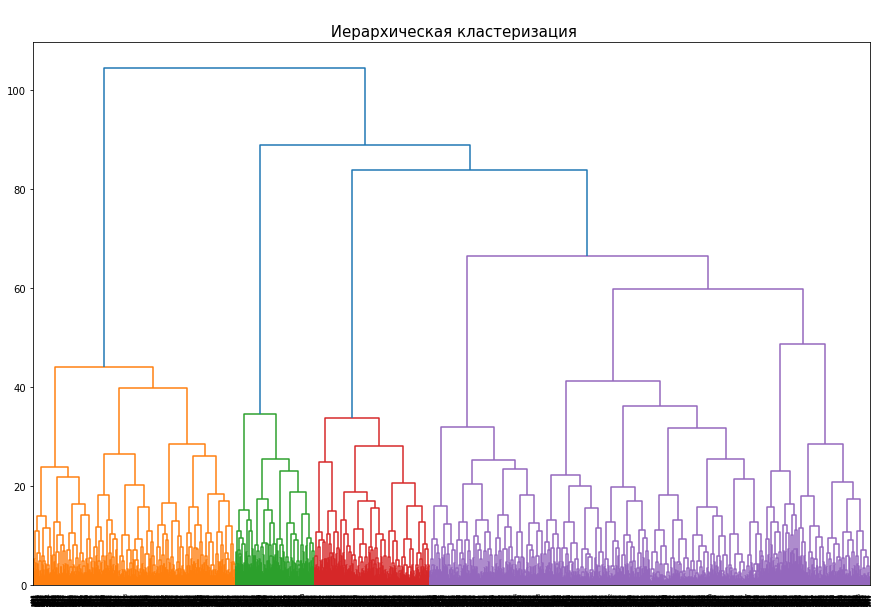

In [24]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()

На графике можно наблюдать 4 основных выделенных кластера пользователей.

In [25]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)

df['cluster_km'] = labels

Обучение модели кластеризации и последующее её применение, результатом которого становится новый столбец в датафрейме.

In [26]:
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Группировка данных по кластерам и вывод средних значений.

In [27]:
df.groupby('cluster_km')['gender'].count()

cluster_km
0    1010
1     385
2     505
3    1262
4     838
Name: gender, dtype: int64

Количество пользователей в кластерах.

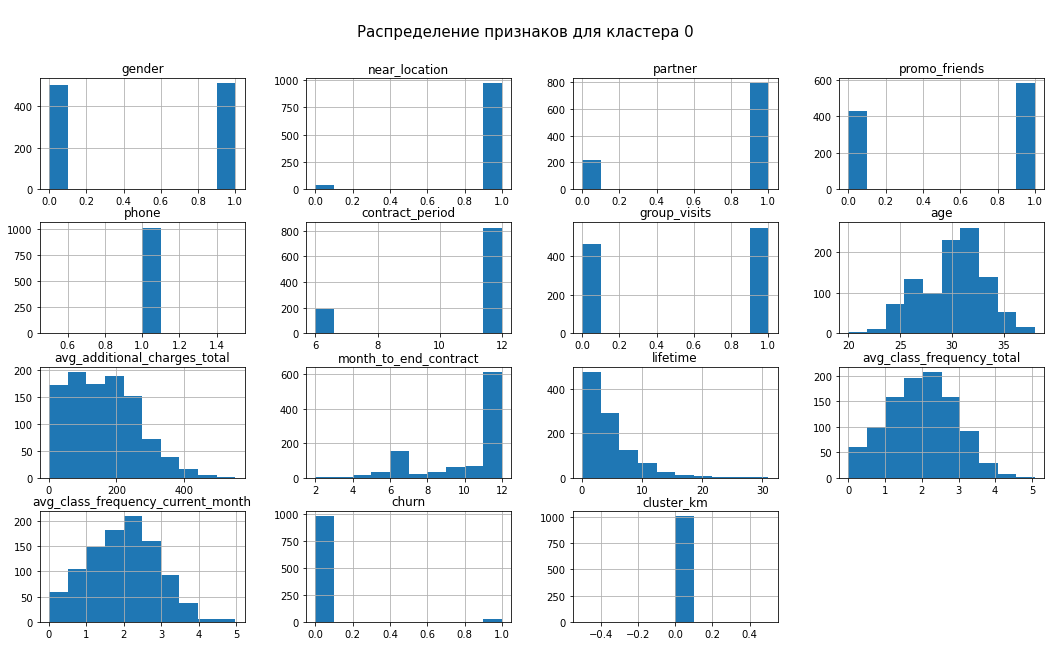

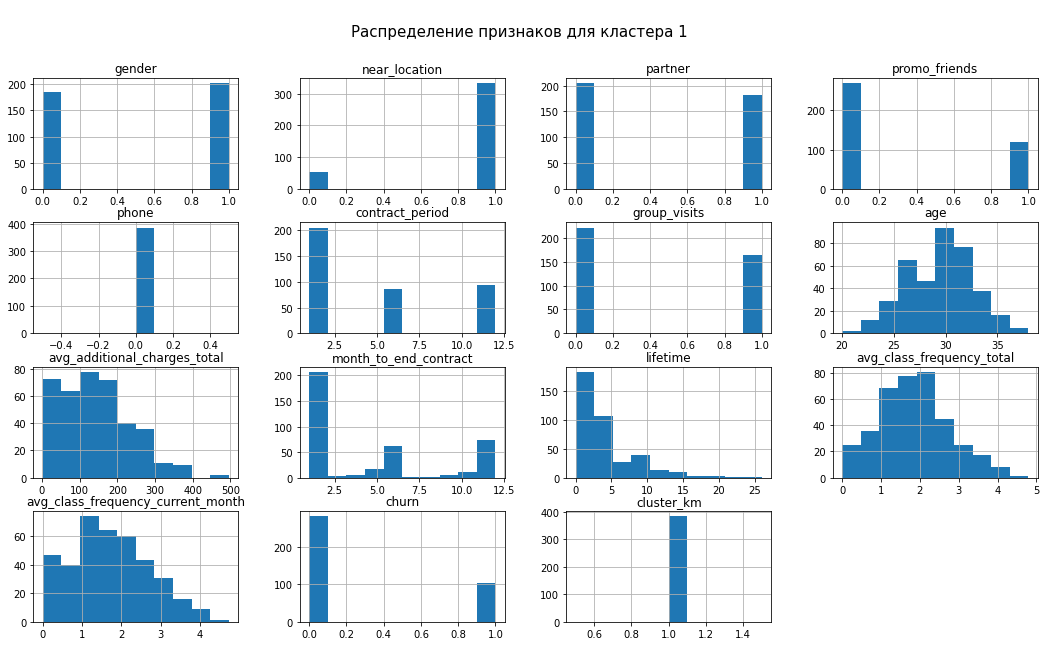

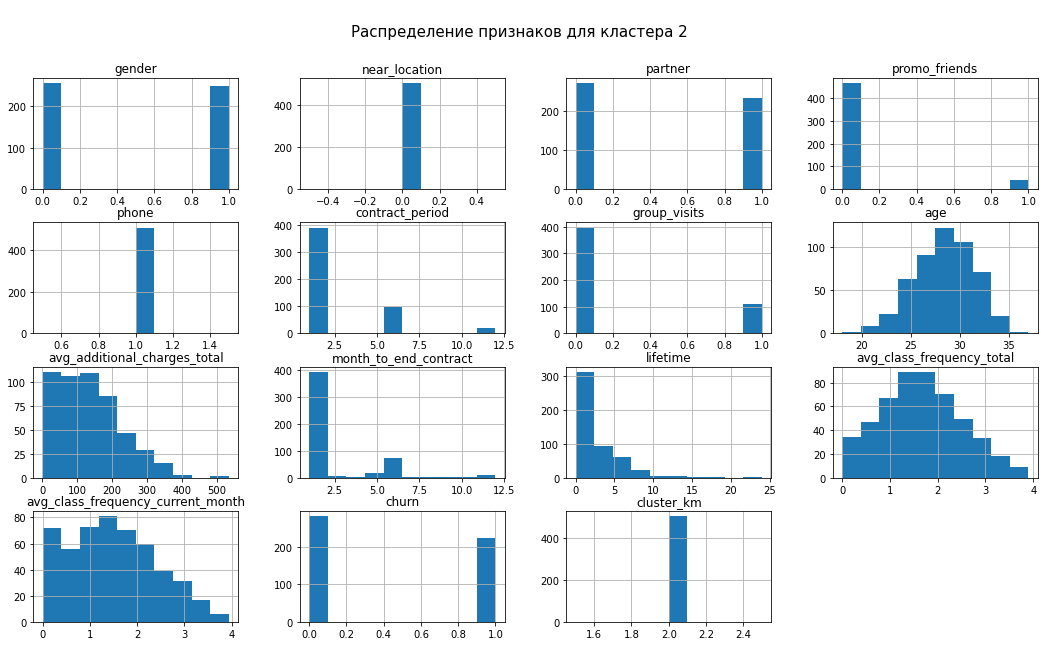

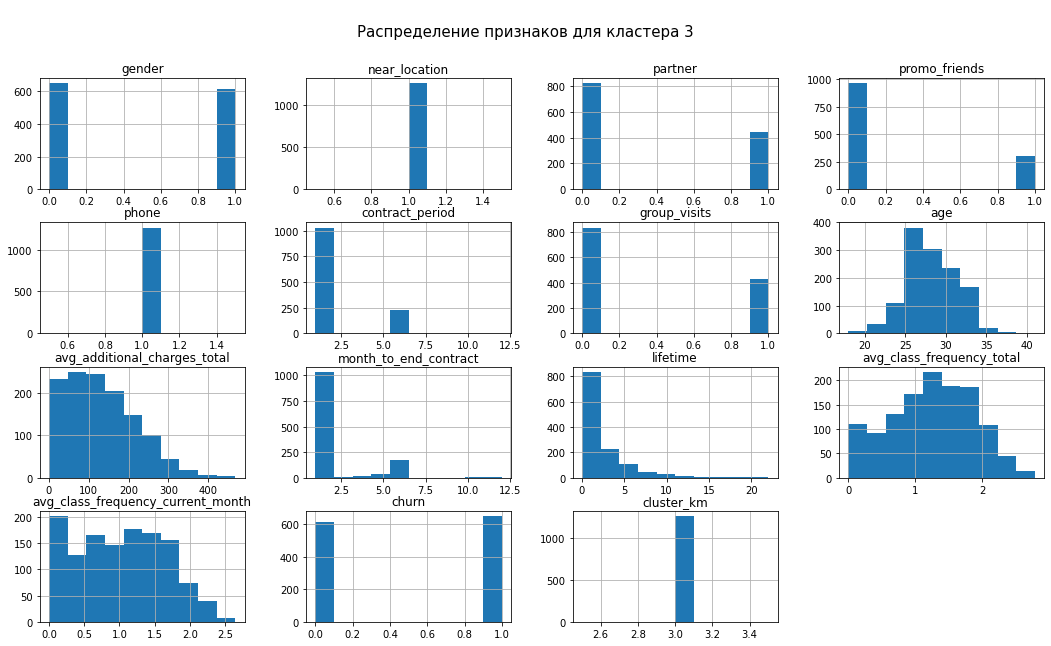

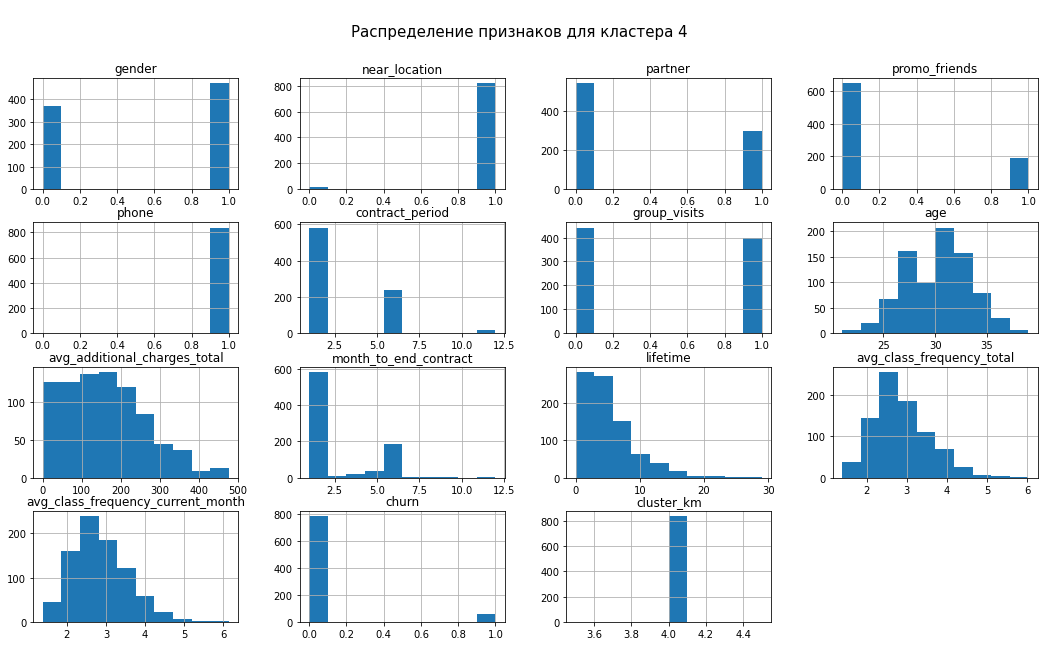

In [28]:
for i in [0, 1, 2, 3, 4]:
    df[df['cluster_km']== i].hist(figsize=(18,10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(i), fontsize = 15)
    plt.show()

Графики распределения значений признаков для каждого отдельно взятого кластера.

### Вывод

На основе полученных графиков и таблиц можно сделать следующие выводы о пользователях:
* **Кластер 0**
    * Проживают или работают недалеко от фитнес-центра
    * 78% пользователей являются сотрудниками компаний-партнеров
    * Более половины пользователей пользовались акцией «приведи друга» 
    * Самые длительные действующие абонементы, чуть менее 11 месяцев
    * Наименьший отток среди клиентов - 3%
* **Кластер 1**
  * Отток - 26%
  * Проживают или работают недалеко от фитнес-центра
  * Не оставляют контактный номер
  * Вторые в списке по длительности абонементов - 4.8 месяца
* **Кластер 2**
  * Отток - 44%
  * Проживают или работают в другом районе
  * Наименьший процент участия в акции «приведи друга» - 8%
  * Наименьший процент посещения групповых занятий - 21%
* **Кластер 3**
  * Самый высокий отток - 52% 
  * Абсолютно все пользователи жители или работники близлежащей от фитнес-центра территории
  * Самая низкая средняя длительность абонементов - 2 месяцы
  * Наименьшее количествово посещений за всё время и последний месяц
* **Кластер 4**
  * Отток - 7%
  * Проживают или работают недалеко от фитнес-центра
  * Тратят больше всех на второстепенные услуги - 162 у.е.
  * Наибольшее еженедельное количество посещение   - 2.9 раз
  * Средняя длительность абонементов -  2.9 месяцев

## Вывод и рекомендации

На основе всей вышеизложенной информации, всех предоставленных графиков, таблиц и вычислений можно сделать следующие выводы.

Наиболее предпочтительными клиентами для сети фитнес-центров «Культурист-датасаентист» являются пользователи из группы **№0.**  
Посетители такого типа предпочтительно приобретают абонементы с наибольшими сроками действия.  
Они же чаще других попадают в фитнес-зал по приглашению своих коллег/партнеров/друзей. Это может подтолкнуть их на похожее действие и спровоцировать эффект сарафанного-радио. Клиенты будут привлекаться за счет бесплатной рекламы.

Следующая группа на которую стоит обратить внимание, это **№4.**  
Данные пользователи чаще других посещают фитнес-центр. Это провоцирует их на дополнительные траты за вспомогательные услуги.
Так-же они реже пользуются промокодами и скидками при покупке абонементов, что еще больше повышает прибыль. 

Наилучшими действиями для повышения бизнес показателей в виде количества новых клиентов и последующей прибыли станут:
* Повышение лояльности клиентов из группы **№0** за счет предоставления скидок/акций/промокодов
* Мотивация делиться информацией о фитнес-центре с помощью интернета и соцсетей за вышеописанные бонусы
* Проводить сезонные рекламные компании которые будут затрагивать пользователей, схожих с пользователями из группы **№4.**